## **Author: Magdy El-Rawy**
## **Spark Foundation Internship (GRIP)**
### **Data Science & Business Analytics**

### **Task 1:Prediction using Supervised Machine Learning**
In this Project we will explain and apply prediction using supervised machine learning.
#### **Linear Regression using Python Scikit-Learn Library** 
In this project we will use Python Scikit-Learn Library for machine learning to implement linear regression task.
#### **Task Statement:** 
Predict the percentage of a student based on the no of study hours using linear regression model with two variables.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

## Prepare Data

### Import

In [11]:
df = pd.read_csv("http://bit.ly/w-data")

In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Explore

In [14]:
df.shape

(25, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The information above confirm the data types are correct and there's no null data 

In [16]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


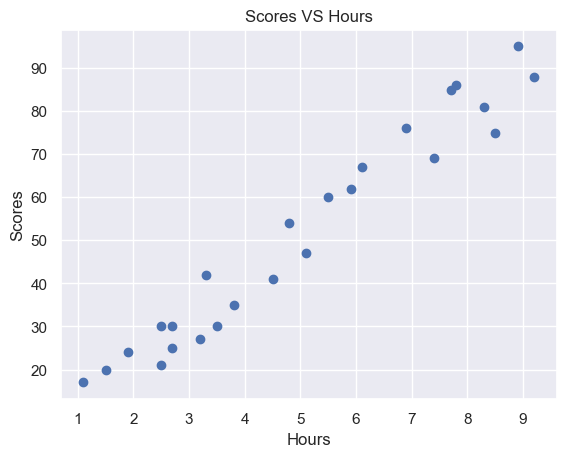

In [17]:
plt.scatter(x=df["Hours"], y=df["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores VS Hours");

From the visualization above seems that there's a positive linear correlation between study hours spent and scores. This means that study hours is a good feature to use to predict score

In [18]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


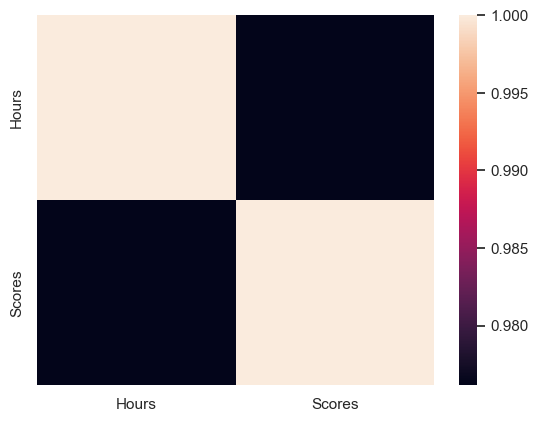

In [19]:
sns.heatmap(corr);

This visualization confirms this positive correlation

### Split Data

In [20]:
target = "Scores"
features = ["Hours"]
X_train = df[features]
y_train = df[target]

In [21]:
print(X_train.shape)
X_train.head()

(25, 1)


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [22]:
print(y_train.shape)
y_train.head()

(25,)


0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

## Build Model

### Baseline
The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction that will be here the mean score — in this case, it predicts the same score regardless of the study hours spent. So let's start by figuring out what our baseline model's prediction should be. 

In [23]:
y_mean = y_train.mean()
y_mean

51.48

In [24]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[51.48, 51.48, 51.48, 51.48, 51.48]

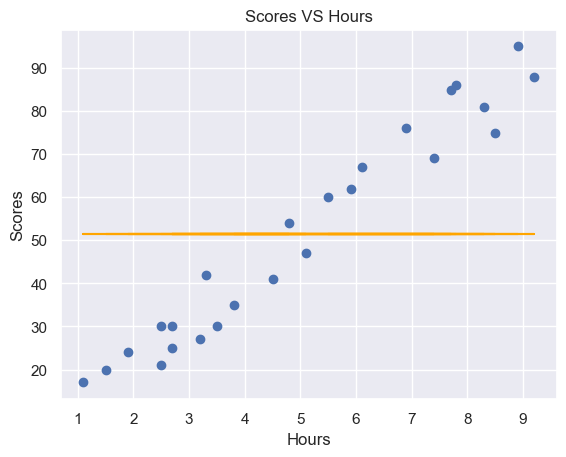

In [25]:
plt.plot(X_train.values, y_pred_baseline, color="orange")
plt.scatter(X_train, y_train)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores VS Hours");

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data.
and we will use performance metric to evaluate the model and the one that we will use here is mean absolute error

In [26]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean score", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean score 51.48
Baseline MAE: 22.42


What does this information tell us? If we always predicted that the percentage is 51.48, our predictions would be off by an average of 22.42. It also tells us that our model needs to have mean absolute error below 22.42 in order to be useful. 

### Iterate
This is the second step in building a model. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. 

In [27]:
model = LinearRegression()

Here we created our linear model

Now what we need to do is use our data to train our model. Another way to say this is fit our model to the training data. 

In [28]:
model.fit(X_train.values, y_train.values)

LinearRegression()

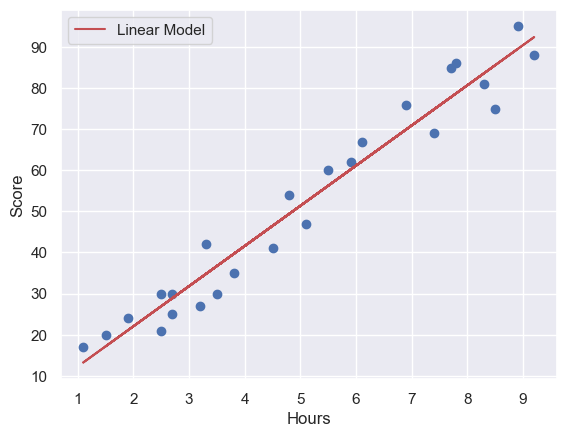

In [29]:
plt.plot(X_train.values, model.predict(X_train.values), color="r", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend();

### Evaluate
Now we evaluate our model performance, First we will see how well our model performs when making predictions the data it saw during the training.

In [30]:
y_pred_training = model.predict(X_train.values)
y_pred_training[:5]

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527])

In [31]:
# Comparing Actual vs Predicted
predictions = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_training})  
predictions

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


Now by using the predictions we will assess our model's performance with the training data, we will use the mean absolute error metric too.

In [32]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 4.97


Here we're gonna evaluate our model by our own new data

In [33]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90985477015731
